# Kwic - Keywords in Context
1 [Datensatz Original](#dataset_ori)

1.1 [Texte vorverarbeiten](#preprocess_ori)

1.2 [KWIC erstellen](#kwic_ori)

1.3 [POS Tagger](#pos_ori)

2 [Datensatz Fanfiction](#dataset_fan)

2.1 [Texte vorverarbeiten](#preprocess_fan)

2.2 [KWIC erstellen](#kwic_fan)

2.3 [POS Tagger](#pos_fan)



## 1 Datensatz Original <a class="anchor" id="dataset_ori"></a>

Im ersten Schritt werden die Originaltexte eingelesen

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/jonas/Documents/Uni_Wuerzburg/Digital_Humanities/Projekt/Fanfiction/df_original.csv', encoding='utf-8')


In [4]:
df.head()

,Autor,Titel,Übersetzer,Original_Titel,ISBN,Datum,Text,removed_stop_word_lower,removed_stop_word,number_of_tokens,number_of_types,clean_text,network_text
0,J.K. Rowling,HARRY POTTER und der Gefangene von Askaban,Klaus Fritz,Harry Potter and the Prisoner of Azkaban,978-1-78110-057-8,1999,"\n\n\nFür Jill Prewett und Aine Kiely,\n\ndie ...","\n\n\nfür jill prewett und aine kiely,\n\ndie ...","jill prewett aine kiely, patinnen souls inhalt...",115980.0,19479.0,jill prewett aine kiely patinnen souls inhalt ...,für jill prewett und aine kiely die patinne...
1,J.K. Rowling,HARRY POTTER und der Halbblutprinz,Klaus Fritz,Harry Potter and the Half-Blood Prince,978-1-78110-060-8,2005,"\n\n\nMackenzie,\n\nmeiner schönen Tochter,\n\...","\n\n\nmackenzie,\n\nmeiner schönen tochter,\n\...","mackenzie, schönen tochter, widme zwilling tin...",179884.0,26838.0,mackenzie schönen tochter widme zwilling tinte...,mackenzie meiner schönen tochter widme ich...
2,J.K. Rowling,HARRY POTTER und der Orden des Phönix,Klaus Fritz,Harry Potter and the Order of the Phoenix,978-1-78110-059-2,2003,"\n\n\n\n\nFür Neil, Jessica und David,\n\ndie ...","\n\n\n\n\nfür neil, jessica und david,\n\ndie ...","neil, jessica david, welt verzaubern inhalt du...",268898.0,35356.0,neil jessica david welt verzaubern inhalt dudl...,für neil jessica und david die meine welt ...
3,J.K. Rowling,HARRY POTTER und der Stein der Weisen,Klaus Fritz,Harry Potter and the Philosopher’s Stone,978-1-78110-055-4,1997,"\n\n\n\nFür Jessica, für Anne und fü Di;\n\nJe...","\n\n\n\nfür jessica, für anne und fü di;\n\nje...","jessica, anne fü di; jessica mag geschichten, ...",84152.0,15910.0,jessica anne fü di jessica mag geschichten ann...,für jessica für anne und fü di jessica mag ...
4,J.K. Rowling,HARRY POTTER und die Heiligtümer des Todes,Klaus Fritz,Harry Potter and the Deathly Hallows,978-1-78110-061-5,2007,\n\n\nDie\n\nWidmung\n\ndieses Buches\n\nist\n...,\n\n\ndie\n\nwidmung\n\ndieses buches\n\nist\n...,"widmung buches siebengeteilt: neil, jessica, d...",207576.0,29725.0,widmung buches siebengeteilt neil jessica davi...,die widmung dieses buches ist siebengete...


### 1.1 Texte vorverarbeiten <a class="anchor" id="preprocess_ori"></a>

Im zweiten Schritt werden die Texte zum Analysieren vorbereitet

In [3]:
def get_tokens(my_original_files):
    '''
    Returns list of tokens.

            Parameters:
                    my_original_files (list): list of text
    '''
    from nltk.tokenize import word_tokenize 
    wordsFiltered = []
    for i in my_original_files:
    
        
        tokens = word_tokenize(i) 
        for w in tokens:
            if w.isalpha():
            
                wordsFiltered.append(w)
                
    return wordsFiltered
        
    
    

In [4]:
my_original_files = list(df.clean_text.values)

Originaltexte ohne Stopppwörter und unnötige Zeichen werden tokenisiert

In [5]:
wordsFiltered = get_tokens(my_original_files)
len(wordsFiltered)

652252

Mithilfe des nltk-Packages kann man sich die ersten Kontextwörter von Harry ausgeben lassen. Anahnd dieses Einblickes erkennt man, dass sowohl die Zauberei, sein Onkel, seine Tante, aber auch Hermine und Ron eine Rolle für Harry spielen.

In [8]:
from nltk.text import Text
textList = Text(wordsFiltered)
textList.concordance('harry')

Displaying 25 of 17249 matches:
rmines geheimnis eulenpost eulenpost harry potter vielerlei hinsicht höchst ung
prechenden absatzes hielt feder inne harry schob brille runden gläsern nase hoc
verkleidungen fangen verbrennen ließ harry steckte feder zähne kramte kopfkisse
igusterweg nummer vier grund weshalb harry sommerferien nie genießen konnte onk
g tante petunia onkel vernon gehofft harry immer knute hielten zauberei schließ
iger angst davor jemand herausfinden harry seit zwei jahren hogwarts ging schul
chließen verbieten nachbarn sprechen harry zauberbücher herankam erhebliches pr
chrumpftränke professor snape lehrer harry wenigsten leiden konnte grund freuen
ten leiden konnte grund freuen würde harry monat nachsitzen aufzubrummen deshal
onat nachsitzen aufzubrummen deshalb harry ersten ferienwoche gelegenheit beim 
nnten ebenfalls notiz nehmen schlich harry unten knackte schloss treppenschrank
hren nachts zauberei büffelte gerade harry ärger onkel tante preis vermeiden oh
rerfamil

Als nächstes kann man sich die Verteilung der Figuren, wie häufig sie in den Texten auftauchen, anzeigen lassen. Wie nicht anders zu erwarten, tritt Harry fast durchgehend auf, während Draco Malfoy und Lord Voldemort an einigen Stellen keine Erwähnung finden. Das spricht dafür, dass zum Beispiel Lord Voldemort meistens nur am Ende der Bände in die Handlung miteinbezogen wird und Draco Malfoy wiederum nicht in jedem Buch eine größere Rolle spielt. 

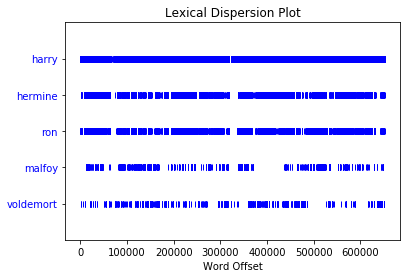

In [10]:
textList.dispersion_plot(["harry", "hermine", "ron", "malfoy", "voldemort"])

Um den Kontext aller Figuren zu erhalten, wird eine Funktion erstellt, die anhand eines Wortes bzw. Namens fünf Wörter nach und fünf Wörter vor dem Key-Wort in eine Liste speichert. Die Kontextwörter werden mit einem Delimiter, in diesem Fall ein Semikolon getrennt, um diese später einfach und schneller in verschiedene Spalten eines Dataframes umzuschreiben. Zusätzlich wird die Stelle bzw. die Zeile, in der das Wort gefunden wurde, mit aufgenommen. 

### 1.2 KWIC erstellen <a class="anchor" id="kwic_ori"></a>

In [10]:
def makeConc(word2conc,list2FindIn,context2Use,concList):
    '''
    Returns a list with context from a word/name.

            Parameters:
                    word2conc(str): word to search for
                    list2FindIn(str): text of tokens
                    context2Use(int): range word right and left side of key
                    conclist(list): new list for the context
    '''
    
    end = len(list2FindIn)
    for location in range(end):
        if list2FindIn[location] == word2conc:
            # Here we check whether we are at the very beginning or end
            if (location - context2Use) < 0:
                beginCon = 0
            else:
                beginCon = location - context2Use
                
            if (location + context2Use) > end:
                endCon = end
            else:
                endCon = location + context2Use + 1
                
            theContext = (list2FindIn[beginCon:endCon])
            
            concordanceLine = '; '.join(theContext)
            
            concList.append(str(location) + "; " + concordanceLine)
            
            return concList

Listen mit Namen werden definiert, nach denen in den Texten gesucht werden soll.

In [27]:
names = ["harry", "harrys", "ron", "rons", "weasley", "weasleys", "hermine", "hermines", "snape", "snapes", "dumbledore", "dumbledores", "voldemort", "voldemorts","malfoy", "malfoys", "draco", "dracos"]

In [85]:
names2 = ["ronald", "ronalds", "riddle", "riddles", "granger", "grangers", 'potter', 'potters']

In [7]:
names3 = ["blaise", "blaises", "seamus"]

In [5]:
names4 = ['sirius', 'ginnys', 'ginny']

In [8]:
theConc = []
for i in names4:
    name = makeConc(i,wordsFiltered,int(5),theConc)
    theConc.append(name)
theConc[-5:]

['597731; einfach; das; geht; nicht; sagte; ginny; lief; scharlachrot; an; ich; gehe',
 '600602; mehr; mittelpunkt; aufmerksamkeit; standen; neville; ginny; tanzten; ganz; nähe; konnte; ginny',
 '600607; ginny; tanzten; ganz; nähe; konnte; ginny; immer; gesicht; verziehen; sehen; neville',
 '631276; so; jedenfalls; schwierig; fred; george; ginny; kamen; setzten; dazu; harry; machte',
 None]

Aus der Liste wird ein Dataframe erstellt, das in jeder Spalte ein Kontextwort besitzt.

In [9]:
dfObj = pd.DataFrame(theConc)

In [10]:
len(dfObj)

1910

In [11]:
df_all_keys = pd.DataFrame(dfObj[0].str.split(';', expand=True).values)

In [12]:
df_all_keys

,0,1,2,3,4,5,6,7,8,9,10,11
0,5290,stanley,blätterte,titelseite,zurück,kiekste,sirius,black,sagte,kopfnickend,natürlich,muggelnachrichten
1,5327,las,black,immer,freiem,fuß,sirius,black,wohl,berüchtigtste,gefangene,je
2,5433,tötete,harry,sah,überschatteten,augen,sirius,black,einzige,partie,eingesunkenen,gesichts
3,5630,verschwunden,war,gaben,klein,bei,sirius,black,gehört,dachte,zweite,mann
4,5763,sagte,stan,begutachtete,erneut,zeitungsfoto,sirius,blacks,ausgemergeltem,gesicht,hat,nie
...,...,...,...,...,...,...,...,...,...,...,...,...
1905,597731,einfach,das,geht,nicht,sagte,ginny,lief,scharlachrot,an,ich,gehe
1906,600602,mehr,mittelpunkt,aufmerksamkeit,standen,neville,ginny,tanzten,ganz,nähe,konnte,ginny
1907,600607,ginny,tanzten,ganz,nähe,konnte,ginny,immer,gesicht,verziehen,sehen,neville
1908,631276,so,jedenfalls,schwierig,fred,george,ginny,kamen,setzten,dazu,harry,machte


In [13]:
df_all_keys["index"] = df_all_keys[6]

In [14]:
df_all_keys.set_index("index", inplace = True)

In [15]:
df_all_keys = df_all_keys.rename(columns={6: "key_word"})

In [16]:
df_all_keys = df_all_keys.rename(columns={1: -5, 2: -4, 3:-3, 4:-2, 5:-1,7:1, 8:2, 9:3, 10:4, 11:5, 0:"location"})

In [17]:
df_all_keys

,location,-5,-4,-3,-2,-1,key_word,1,2,3,4,5
index,,,,,,,,,,,,
sirius,5290,stanley,blätterte,titelseite,zurück,kiekste,sirius,black,sagte,kopfnickend,natürlich,muggelnachrichten
sirius,5327,las,black,immer,freiem,fuß,sirius,black,wohl,berüchtigtste,gefangene,je
sirius,5433,tötete,harry,sah,überschatteten,augen,sirius,black,einzige,partie,eingesunkenen,gesichts
sirius,5630,verschwunden,war,gaben,klein,bei,sirius,black,gehört,dachte,zweite,mann
sirius,5763,sagte,stan,begutachtete,erneut,zeitungsfoto,sirius,blacks,ausgemergeltem,gesicht,hat,nie
...,...,...,...,...,...,...,...,...,...,...,...,...
ginny,597731,einfach,das,geht,nicht,sagte,ginny,lief,scharlachrot,an,ich,gehe
ginny,600602,mehr,mittelpunkt,aufmerksamkeit,standen,neville,ginny,tanzten,ganz,nähe,konnte,ginny
ginny,600607,ginny,tanzten,ganz,nähe,konnte,ginny,immer,gesicht,verziehen,sehen,neville


Nachdem alle Columnen umbenannt und das jeweilige Key-Word als Index gesetzt wurde, wird dieser genormt, sodass die Einträge zu Harrys und Harry unter einem Index, nämlich Harry auftauchen. 

In [20]:
# rename index of kwic Dataframe
#df_all_keys.rename(index={' riddles':'voldemort'},inplace=True)
#df_all_keys.rename(index={' riddle':'voldemort'},inplace=True)
#df_all_keys.rename(index={' ronald':'ron'},inplace=True)
#df_all_keys.rename(index={' ronalds':'ron'},inplace=True)
#df_all_keys.rename(index={' granger':'hermine'},inplace=True)
#df_all_keys.rename(index={' grangers':'hermine'},inplace=True)
df_all_keys.rename(index={' sirius':'sirius'},inplace=True)
#df_all_keys.rename(index={' potter':'harry'},inplace=True)

In [22]:
df_all_keys.to_csv("Kwic/kwic_original_4.csv")

### 1.3 POS Tagger <a class="anchor" id="pos_ori"></a>
Wurden alle Kontextwörter für die Figuren gefunden und gespeichert, werden im nächsten Schritt alle Adjektive, Verben und Nomen sowie Namen aus dem Kontext gezogen und in eine neue Spalte hinzugefügt. 

In [171]:
!pip install HanTa

Da es sich um deutsche Texte handelt, muss ein deutscher POS-Tagger verwendet werden. In diesem Projekt wurde sich auf den HanoverTagger festgelegt, da er im Gegensatz zu Spacy, einige Adjektive besser erkannt hat. 

In [10]:
from HanTa import HanoverTagger as ht

# vortrainiertes Modell laden
tagger = ht.HanoverTagger('morphmodel_ger.pgz')

In [23]:
df_all_keys.reset_index(inplace=True)

In [24]:
df_all_keys.drop(df_all_keys[df_all_keys['index'].isnull()].index, inplace=True)

In [25]:
df_all_keys.set_index("index", inplace = True)

In [26]:
df_all_keys.columns

Index(['location', -5, -4, -3, -2, -1, 'key_word', 1, 2, 3, 4, 5], dtype='object')

In [27]:
df = df_all_keys[-5].str.cat(df_all_keys[[-4,-3,-2,-1,1,2,3,4,5]], sep ="") 

In [28]:
df = df.to_frame()
df= df[df[-5].notnull()]

In einem Python-Script werden drei Funktionen definiert, die die Ajektive, Verben und Nomen aus einer Liste von Texten herausfiltern. Um den Vorgang zu beschleunigen, wird ein Prozessor verwendet, der die Aufgaben parallel startet, sodass die Rechenzeit um die Hälfte reduziert wird. 
Gerade bei der großen Datenmenge der Fanfictiontexte ist dieser Vorgang essentiell für ein schnelleres Arbeiten. 

In [37]:
from helpyy import get_nouns, get_verbs, get_adjectives
import concurrent.futures

In [30]:
df

,-5
index,
sirius,stanley blätterte titelseite zurück kiekste b...
sirius,las black immer freiem fuß black wohl berücht...
sirius,tötete harry sah überschatteten augen black e...
sirius,verschwunden war gaben klein bei black gehört...
sirius,sagte stan begutachtete erneut zeitungsfoto b...
...,...
ginny,missgelaunt aussah das allmählich dumm kannst...
ginny,einfach das geht nicht sagte lief scharlachro...
ginny,mehr mittelpunkt aufmerksamkeit standen nevil...


In [31]:
%%time
with concurrent.futures.ProcessPoolExecutor(16) as pool:
    df['adjectives'] = list(pool.map(get_adjectives, df[-5], chunksize=1000))
    df['verbs'] = list(pool.map(get_verbs, df[-5], chunksize=1000))
    df['nouns'] = list(pool.map(get_nouns, df[-5], chunksize=1000))

Wall time: 40 s


In [32]:
df

,-5,adjectives,verbs,nouns
index,,,,
sirius,stanley blätterte titelseite zurück kiekste b...,[kiekst],"[blättern, sagen]","[Stanley, Black]"
sirius,las black immer freiem fuß black wohl berücht...,"[frei, berüchtigt]",[],"[Fuß, Gefangen]"
sirius,tötete harry sah überschatteten augen black e...,"[überschattet, einzig, eingesunken]","[töten, sehen]","[Harry, Auge, Black, Partie, Gesicht]"
sirius,verschwunden war gaben klein bei black gehört...,[zweiter],"[verschwinden, sein, geben, hören, denken]","[Black, Mann]"
sirius,sagte stan begutachtete erneut zeitungsfoto b...,[ausgemergelt],"[sagen, begutachten, haben]","[Stan, Black, Gesicht]"
...,...,...,...,...
ginny,missgelaunt aussah das allmählich dumm kannst...,[],"[aussehen, kannen]","[Missgelaunt, Harry]"
ginny,einfach das geht nicht sagte lief scharlachro...,[],"[gehen, sagen, laufen, gehen]",[]
ginny,mehr mittelpunkt aufmerksamkeit standen nevil...,[],"[stehen, tanzen]","[Mittelpunkt, Aufmerksamkeit, Neville, Nähe]"


In [33]:
df.to_csv("Kwic/kwic_original_pos_4.csv")

Vorhandenes Kwic wird mit dem zuletzt generierten Kwic zusammengefügt.

In [34]:
df = pd.read_csv("Kwic/kwic_original_pos_4.csv")
df1 = pd.read_csv("Kwic/kwic_original_pos.csv")

In [35]:
df2 = pd.concat([df, df1])

In [36]:
df2.set_index('index', inplace = True)

In [36]:
df2.rename(index={' seamus':'seamus'},inplace=True)

In [37]:
list(df2.index.unique())

['sirius',
 'ginny',
 'blaise',
 'seamus',
 'harry',
 'ron',
 'voldemort',
 'hermine',
 'snape',
 'dumbledore',
 'draco']

In [38]:
df2.to_csv("Kwic/kwic_original_pos.csv")

## 2 Datensatz Fanfiction <a class="anchor" id="dataset_fan"></a>

In [4]:
# Einlesen von Fanfictiontexten
import pandas as pd
df2 = pd.read_csv('C:/Users/jonas/Documents/Uni_Wuerzburg/Digital_Humanities/Projekt/Fanfiction/Df_one.csv', encoding='utf-8')

### 2.1 Texte vorverarbeiten <a class="anchor" id="preprocess_fan"></a>

Texte im nächsten Schritt vorbereiten

In [6]:
fanfic_files = df2['clean_text'].values.tolist()

In [7]:
wordsFiltered2 = get_tokens(fanfic_files)   

In [8]:
len(wordsFiltered2)

146840625

In [86]:
import random
wordsFiltered2 = random.sample(wordsFiltered2, 500000)

Bei den Fanfictiontexten erkennt man, dass Harry in den ersten 25 Treffern vor allem mit Snape, Lucius und Blaise interagiert.

In [87]:
from nltk.text import Text
textList = Text(wordsFiltered2)
textList.concordance('harry')

Displaying 25 of 4989 matches:
starrte rest begleitest harry du ausbildung frühere verstand nachf
ausgefunden versetzte drein heiraten harry haus abschaum wiederstehen aussagen 
tellen je minky methode thema händen harry spärlich ja ließ hosentasche anderwe
chulen komischen danke fenster zu du harry fährte draco horror stand zurückkehr
 augen schulter narzissa ministerium harry brennt hand nahm draconein schluss s
 zeigte narzissa kopf konntesie hoch harry legte fuhr oben gemeinsames um außer
 hocke draußen dragon seit gemeinsam harry beste mochte liegenden getanich seuf
ls sir schon aussehender erlebnissen harry vater sah drückte angenehme sahsen f
fensichtlich nickte entschied steige harry ach tat naja rückenund severus macht
deutig wissen entscheidung eben ging harry durchs harrys miss sobald sprach par
n grinste stühle schließlich träumte harry klar begann gibt moment drein vater 
ditch schallendes irgendwas was hass harry zeit kann lucius reden angst eingefa
 narcissa gehen tut ho

Bei der Verteilung der Figuren wird das durchgehende Auftauchen von Harry, Hermine und Draco deutlich. 

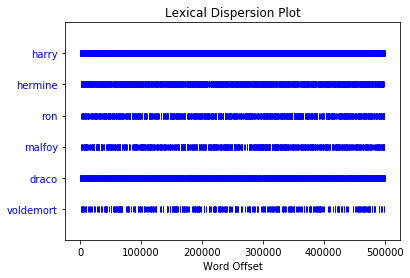

In [89]:
textList.dispersion_plot(["harry", "hermine", "ron", "malfoy", "draco" ,"voldemort"])

### 2.2 KWIC erstellen <a class="anchor" id="kwic_fan"></a>

In [11]:
theConc = []
for i in names4:
    name = makeConc(i,wordsFiltered2,int(5),theConc)
    theConc.append(name)
theConc[-5:]

['144398660; wurde; seaweedbrain; geschrieben; heute; schauspielerin; ginny; weasley; geburtstag; bonnie; wright; ende',
 '144749661; schnarchkackler; schweden; mitbringen; molly; wünschte; ginny; pinken; pullover; stricken; roten; haarentraumjobharry',
 '144959643; absoluter; lieblingsteil; sechste; weil; irgendwie; ginny; harry; fan; bin; aber; buch',
 '145325696; hirn; an; vielleicht; fragen; genie; ginny; queenie; jacob; ebenfalls; lächeln; hallo',
 None]

In [12]:
dfObj = pd.DataFrame(theConc) 

In [13]:
len(dfObj)

423336

In [14]:
df_all_keys = pd.DataFrame(dfObj[0].str.split(';', expand=True).values)

In [15]:
df_all_keys["index"] = df_all_keys[6]

In [16]:
df_all_keys.set_index("index", inplace = True)

In [17]:
df_all_keys = df_all_keys.rename(columns={6: "key_word"})

In [18]:
df_all_keys

,0,1,2,3,4,5,key_word,7,8,9,10,11
index,,,,,,,,,,,,
sirius,2073841,fünften,band,ein,askaban,geflohene,sirius,black,dumbledore,elternhaus,grimmauldplatz,nummer
sirius,3634743,halten,ja,kreischte,halle,für,sirius,black,ja,für,albus,dumbledore
sirius,6191314,geht,erklärte,ich,verstehe,wer,sirius,fragte,caius,sirius,orion,black
sirius,6191317,verstehe,wer,sirius,fragte,caius,sirius,orion,black,reinblut,beste,freund
sirius,6627435,fixierte,neugierig,kein,black,letzte,sirius,wurde,du,weißt,schon,wem
...,...,...,...,...,...,...,...,...,...,...,...,...
ginny,144398660,wurde,seaweedbrain,geschrieben,heute,schauspielerin,ginny,weasley,geburtstag,bonnie,wright,ende
ginny,144749661,schnarchkackler,schweden,mitbringen,molly,wünschte,ginny,pinken,pullover,stricken,roten,haarentraumjobharry
ginny,144959643,absoluter,lieblingsteil,sechste,weil,irgendwie,ginny,harry,fan,bin,aber,buch


In [19]:
df_all_keys = df_all_keys.rename(columns={1: -5, 2: -4, 3:-3, 4:-2, 5:-1,7:1, 8:2, 9:3, 10:4, 11:5, 0:"location"})

In [20]:
df_all_keys

,location,-5,-4,-3,-2,-1,key_word,1,2,3,4,5
index,,,,,,,,,,,,
sirius,2073841,fünften,band,ein,askaban,geflohene,sirius,black,dumbledore,elternhaus,grimmauldplatz,nummer
sirius,3634743,halten,ja,kreischte,halle,für,sirius,black,ja,für,albus,dumbledore
sirius,6191314,geht,erklärte,ich,verstehe,wer,sirius,fragte,caius,sirius,orion,black
sirius,6191317,verstehe,wer,sirius,fragte,caius,sirius,orion,black,reinblut,beste,freund
sirius,6627435,fixierte,neugierig,kein,black,letzte,sirius,wurde,du,weißt,schon,wem
...,...,...,...,...,...,...,...,...,...,...,...,...
ginny,144398660,wurde,seaweedbrain,geschrieben,heute,schauspielerin,ginny,weasley,geburtstag,bonnie,wright,ende
ginny,144749661,schnarchkackler,schweden,mitbringen,molly,wünschte,ginny,pinken,pullover,stricken,roten,haarentraumjobharry
ginny,144959643,absoluter,lieblingsteil,sechste,weil,irgendwie,ginny,harry,fan,bin,aber,buch


In [24]:
# rename index of kwic Dataframe
#df_all_keys.rename(index={' riddles':'voldemort'},inplace=True)
#df_all_keys.rename(index={' riddle':'voldemort'},inplace=True)
#df_all_keys.rename(index={' ronald':'ron'},inplace=True)
#df_all_keys.rename(index={' ronalds':'ron'},inplace=True)
#df_all_keys.rename(index={' granger':'hermine'},inplace=True)
#df_all_keys.rename(index={' grangers':'hermine'},inplace=True)
#df_all_keys.rename(index={' potters':'harry'},inplace=True)
df_all_keys.rename(index={' sirius':'sirius'},inplace=True)

In [55]:
df_all_keys.rename(index={' seamus':'seamus'},inplace=True)

In [25]:
df_all_keys

,location,-5,-4,-3,-2,-1,key_word,1,2,3,4,5
index,,,,,,,,,,,,
sirius,2073841,fünften,band,ein,askaban,geflohene,sirius,black,dumbledore,elternhaus,grimmauldplatz,nummer
sirius,3634743,halten,ja,kreischte,halle,für,sirius,black,ja,für,albus,dumbledore
sirius,6191314,geht,erklärte,ich,verstehe,wer,sirius,fragte,caius,sirius,orion,black
sirius,6191317,verstehe,wer,sirius,fragte,caius,sirius,orion,black,reinblut,beste,freund
sirius,6627435,fixierte,neugierig,kein,black,letzte,sirius,wurde,du,weißt,schon,wem
...,...,...,...,...,...,...,...,...,...,...,...,...
ginny,144398660,wurde,seaweedbrain,geschrieben,heute,schauspielerin,ginny,weasley,geburtstag,bonnie,wright,ende
ginny,144749661,schnarchkackler,schweden,mitbringen,molly,wünschte,ginny,pinken,pullover,stricken,roten,haarentraumjobharry
ginny,144959643,absoluter,lieblingsteil,sechste,weil,irgendwie,ginny,harry,fan,bin,aber,buch


In [26]:
df_all_keys.to_csv("Kwic/POS_FanFic/kwic_fanfic_4.csv")

### POS Tagger <a class="anchor" id="pos_fan"></a>

In [27]:
# Datensatz vorbereiten, sodass nur noch der Kontext in einer Spalte steht
import pandas as pd
df = pd.read_csv("Kwic/POS_FanFic/kwic_fanfic_4.csv")

In [28]:
df.reset_index(inplace=True)

In [29]:
# alle leeren Indexe löschen
df.drop(df[df['index'].isnull()].index, inplace=True)

In [30]:
df.set_index("index", inplace = True)

In [31]:
# Kontextwörter zusammenführen
df_pos = df['-5'].str.cat(df[['-4','-3','-2','-1','1','2','3','4','5']], sep ="") 

In [32]:
df_pos = df_pos.to_frame()

In [33]:
df_pos= df_pos[df_pos['-5'].notnull()]

In [34]:
# Dataframe in 3 Teile splitten, sodass das Erkennen der Adjektive, Verben und Nomen schneller geschieht
import numpy as np
df_split = np.array_split(df_pos, 3)

In [35]:
df_split[0]

,-5
index,
sirius,fünften band ein askaban geflohene black dumb...
sirius,halten ja kreischte halle für black ja für al...
sirius,geht erklärte ich verstehe wer fragte caius s...
sirius,verstehe wer sirius fragte caius orion black ...
sirius,fixierte neugierig kein black letzte wurde du...
...,...
sirius,aber dafür getan aufhören denken arschloch wi...
sirius,dumbledore bestimmt ist nein wut habe remus t...
sirius,benutzt haben nie ganz richtig so wahrscheinl...


In [38]:
%%time
with concurrent.futures.ProcessPoolExecutor(16) as pool:
    df_split[0]['adjectives'] = list(pool.map(get_adjectives, df_split[0]['-5'], chunksize=1000))
    df_split[0]['verbs'] = list(pool.map(get_verbs, df_split[0]['-5'], chunksize=1000))
    df_split[0]['nouns'] = list(pool.map(get_nouns, df_split[0]['-5'], chunksize=1000))

Wall time: 42min 57s


In [39]:
%%time
with concurrent.futures.ProcessPoolExecutor(16) as pool:
    df_split[1]['adjectives'] = list(pool.map(get_adjectives, df_split[1]['-5'], chunksize=1000))
    df_split[1]['verbs'] = list(pool.map(get_verbs, df_split[1]['-5'], chunksize=1000))
    df_split[1]['nouns'] = list(pool.map(get_nouns, df_split[1]['-5'], chunksize=1000))

Wall time: 43min 42s


In [40]:
%%time
with concurrent.futures.ProcessPoolExecutor(16) as pool:
    df_split[2]['adjectives'] = list(pool.map(get_adjectives, df_split[2]['-5'], chunksize=1000))
    df_split[2]['verbs'] = list(pool.map(get_verbs, df_split[2]['-5'], chunksize=1000))
    df_split[2]['nouns'] = list(pool.map(get_nouns, df_split[2]['-5'], chunksize=1000))

Wall time: 38min 2s


In [41]:
# alle Teile wieder zusammenfügen
df_all = pd.concat([df_split[0], df_split[1], df_split[2]])

In [42]:
df_all

,-5,adjectives,verbs,nouns
index,,,,
sirius,fünften band ein askaban geflohene black dumb...,"[fünfter, geflohen]",[],"[Band, Grimmauldplatz, Nummer]"
sirius,halten ja kreischte halle für black ja für al...,[],"[halten, kreischen]","[Halle, Black]"
sirius,geht erklärte ich verstehe wer fragte caius s...,[],"[gehen, erklären, verstehen, fragen]",[]
sirius,verstehe wer sirius fragte caius orion black ...,[gut],"[verstehen, fragen]",[Freund]
sirius,fixierte neugierig kein black letzte wurde du...,"[fixiert, letzter]","[werden, wissen]",[Black]
...,...,...,...,...
ginny,freundinnen ihr sophia combeferre rebekka z h...,[],"[heißen, machen]","[Freundinnen, Z]"
ginny,wurde seaweedbrain geschrieben heute schauspi...,[],"[werden, schreiben]","[Seaweedbrain, Schauspielerin, Geburtstag, Ende]"
ginny,schnarchkackler schweden mitbringen molly wün...,[rot],"[mitbringen, wünschen, stricken]","[Schnarchkackler, Schweden, Pullover, Haarentr..."


In [43]:
df_all.to_csv("Kwic/POS_FanFic/kwic_fanfic_pos_4.csv")

In [44]:
df1 = pd.read_csv("Kwic/POS_FanFic/kwic_fanfic_pos_4.csv")
df2 = pd.read_csv("Kwic/POS_FanFic/kwic_fanfic_pos.csv")

In [45]:
df_all_pos = pd.concat([df1, df2])

In [46]:
df_all_pos.set_index('index', inplace = True)

In [47]:
df_all_pos.rename(index={' draco':'draco'},inplace=True)

In [48]:
list(df_all_pos.index.unique())

['sirius',
 'ginny',
 'blaise',
 'seamus',
 'ron',
 'voldemort',
 'hermine',
 'harry',
 'snape',
 'dumbledore',
 'draco']

In [49]:
df_all_pos

,-5,adjectives,verbs,nouns
index,,,,
sirius,fünften band ein askaban geflohene black dumb...,"['fünfter', 'geflohen']",[],"['Band', 'Grimmauldplatz', 'Nummer']"
sirius,halten ja kreischte halle für black ja für al...,[],"['halten', 'kreischen']","['Halle', 'Black']"
sirius,geht erklärte ich verstehe wer fragte caius s...,[],"['gehen', 'erklären', 'verstehen', 'fragen']",[]
sirius,verstehe wer sirius fragte caius orion black ...,['gut'],"['verstehen', 'fragen']",['Freund']
sirius,fixierte neugierig kein black letzte wurde du...,"['fixiert', 'letzter']","['werden', 'wissen']",['Black']
...,...,...,...,...
draco,scorpius sah fühlte an lügen vermutung mädche...,['schnell'],"['sehen', 'fühlen', 'lügen', 'sein']","['Scorpius', 'Vermutung', 'Mädchen', 'Herz']"
draco,es lügner fühlenstattdessen griff langsam han...,"['fühlenstattdessen', 'langsam']","['greifen', 'liegen', 'halten']","['Lügner', 'Hand', 'Knie']"
draco,toast erlaubte ihr schulter sitzen brief umsc...,['scorpiusich'],"['erlauben', 'sitzen', 'ziehen']","['Toast', 'Schulter', 'Brief', 'Umschlag']"


In [50]:
df_all_pos.to_csv("Kwic/POS_FanFic/kwic_fanfic_pos.csv")